## Import and define functions

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
def quick_plot(run, channel,**kwargs):
    file = np.loadtxt("data/"+run+"/Histo_Ch0"+channel+".txt")
    plt.plot(file[:,0], file[:,1],**kwargs)
    plt.legend()

In [11]:
def save_plots(group, max_channel):
    run_list = np.genfromtxt("results/runs_"+group+".txt",comments=None, dtype=str)[:,0]
    images = []
    for run in run_list:
        for channel in range(1,max_channel+1):
            file = "data/"+run+"/Fit_Ch0"+str(channel)+"_10paras.png"
            images.append(Image.open(file))

    images[0].save("results/plots_"+group+"_10paras.pdf", "PDF" ,resolution=100.0, save_all=True, append_images=images[1:])

In [8]:
def get_paras(group, max_channel):
    run_list = np.genfromtxt("results/runs_"+group+".txt",comments=None, dtype=str)[:,0]
    paras, errors = np.empty([len(run_list), max_channel, 6]), np.empty([len(run_list), max_channel, 6])
    
    for i, run in enumerate(run_list):
        for j in range(max_channel):
            channel = j+1
            file = np.genfromtxt("data/"+run+"/Fit_Ch0"+str(channel)+".dat",comments=None)
        
            paras[i,j,0], errors[i,j,0] = file[0,1]+file[10,1], file[0,2]+file[10,2]  #pedestal
            paras[i,j,1], errors[i,j,1] = file[1,1],            file[1,2]             #scale
            paras[i,j,2], errors[i,j,2] = file[2,1],            file[2,2]             #sigma
            paras[i,j,3], errors[i,j,3] = file[3,1],            file[3,2]             #mu
            paras[i,j,4], errors[i,j,4] = file[4,1],            file[4,2]             #nu
            paras[i,j,5], errors[i,j,5] = file[11,1],           file[11,2]            #chi^2/NDF
            
    return paras, errors

## Analysis

In [12]:
save_plots('s_linearity_1100V_off', 5)

Text(0, 0.5, 'mu')

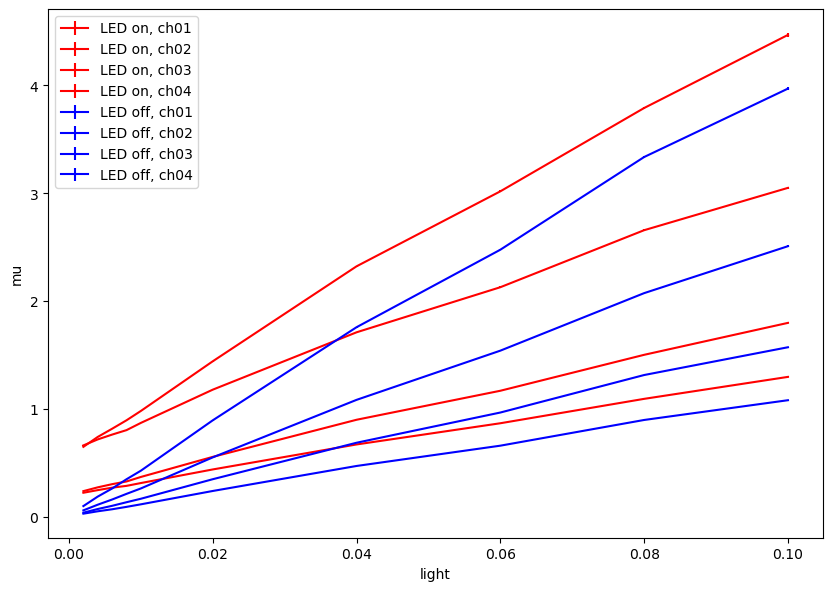

In [47]:
plt.figure(figsize=(10,7), dpi=100)


group = 'c_linearity_1100V_on'

runs          = np.genfromtxt("results/runs_"+group+".txt",comments=None, dtype=str)[:,0]
xpoints       = np.genfromtxt("results/runs_"+group+".txt",comments=None, dtype=float)[:,1]
paras, errors = get_paras(runs, max_channel)
save_plots(runs, max_channel)

for i in range(max_channel):
    plt.errorbar(xpoints,paras[:,i,3],yerr=errors[:,i,3], label='LED on, ch0'+str(i+1),color='r')
    

group = 'c_linearity_1100V_off'

runs          = np.genfromtxt("results/runs_"+group+".txt",comments=None, dtype=str)[:,0]
xpoints       = np.genfromtxt("results/runs_"+group+".txt",comments=None, dtype=float)[:,1]
paras, errors = get_paras(runs, max_channel)
save_plots(runs, max_channel)

for i in range(max_channel):
    plt.errorbar(xpoints,paras[:,i,3], yerr=errors[:,i,3], label='LED off, ch0'+str(i+1),color='b')

plt.legend()
plt.xlabel('light')
plt.ylabel('mu')